In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [12]:
data=pd.read_csv('/content/cancer - Sheet1.csv')

In [13]:
data.head() #displaying the content

,ID,CAS,SMILES,NAME,label,OVERALL
0,0,97-59-6,C1(C(=O)NC(=O)N1)NC(=O)N,Allantoin,0,negative
1,1,71-43-2,C1=CC=CC=C1,Benzene,1,cancer-liver
2,2,120-80-9,C1=CC=C(C(=C1)O)O,Catechol,1,cancer-other
3,3,143-50-0,C1(=O)C2(C3(C4(C1(C5(C2(C3(C(C45Cl)(Cl)Cl)Cl)C...,Kepone,1,cancer-liver
4,4,91-64-5,C1=CC=C2C(=C1)C=CC(=O)O2,Coumarin,1,cancer-liver


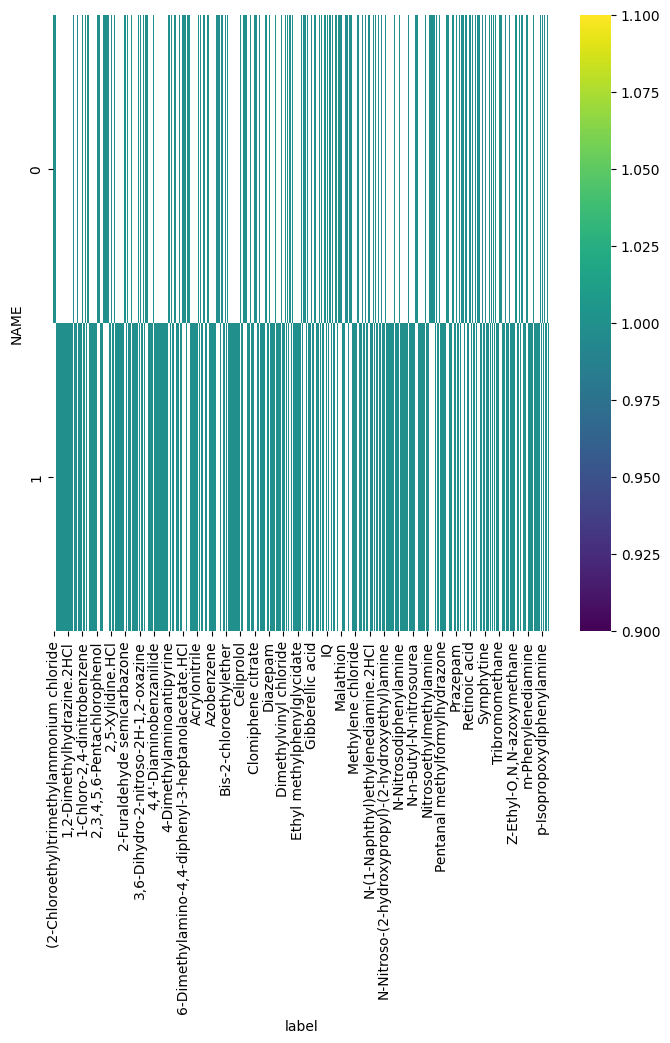

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['label'].value_counts()
    for x_label, grp in data.groupby('NAME')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('label')
_ = plt.ylabel('NAME')

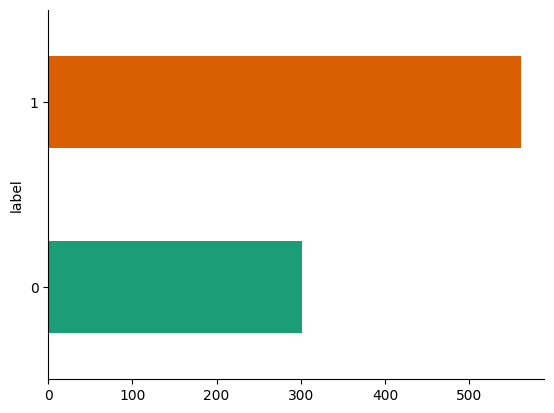

In [15]:

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

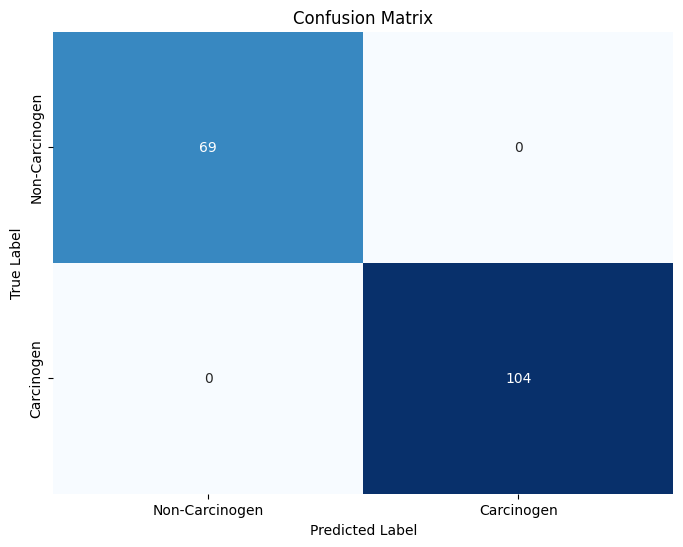

Accuracy: 1.0
Precision: 1.0
CARCINOGENIC


In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('/content/cancer - Sheet1.csv')

vectorizer = CountVectorizer(binary=True, lowercase=True, stop_words='english', vocabulary=['cancer', 'negative'])
X = vectorizer.fit_transform(data['OVERALL'].astype(str))

# Target variable
y = data['label']  # Assuming 'label' column contains the target labels (0 for non-carcinogen, 1 for carcinogen)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#the SVM classifier
model = SVC(kernel='linear')

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy and precision
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Carcinogen', 'Carcinogen'],
            yticklabels=['Non-Carcinogen', 'Carcinogen'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

print("Accuracy:", accuracy)
print("Precision:", precision)

input_text="Ethyl Alcohol"
input_features = vectorizer.transform([input_text])
prediction = model.predict(input_features)[0]

if prediction == 0:
    print("")
else:
    print("CARCINOGENIC")
